In [2]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("../evaluation/results.csv")

# Extract unique datasets and systems
datasets = df["dataset"].unique()
systems = df["system"].unique()

# Prepare the data for radar chart plotting
grouped_data = {dataset: df[df["dataset"] == dataset].set_index("system").iloc[:, 1:].T for dataset in datasets}

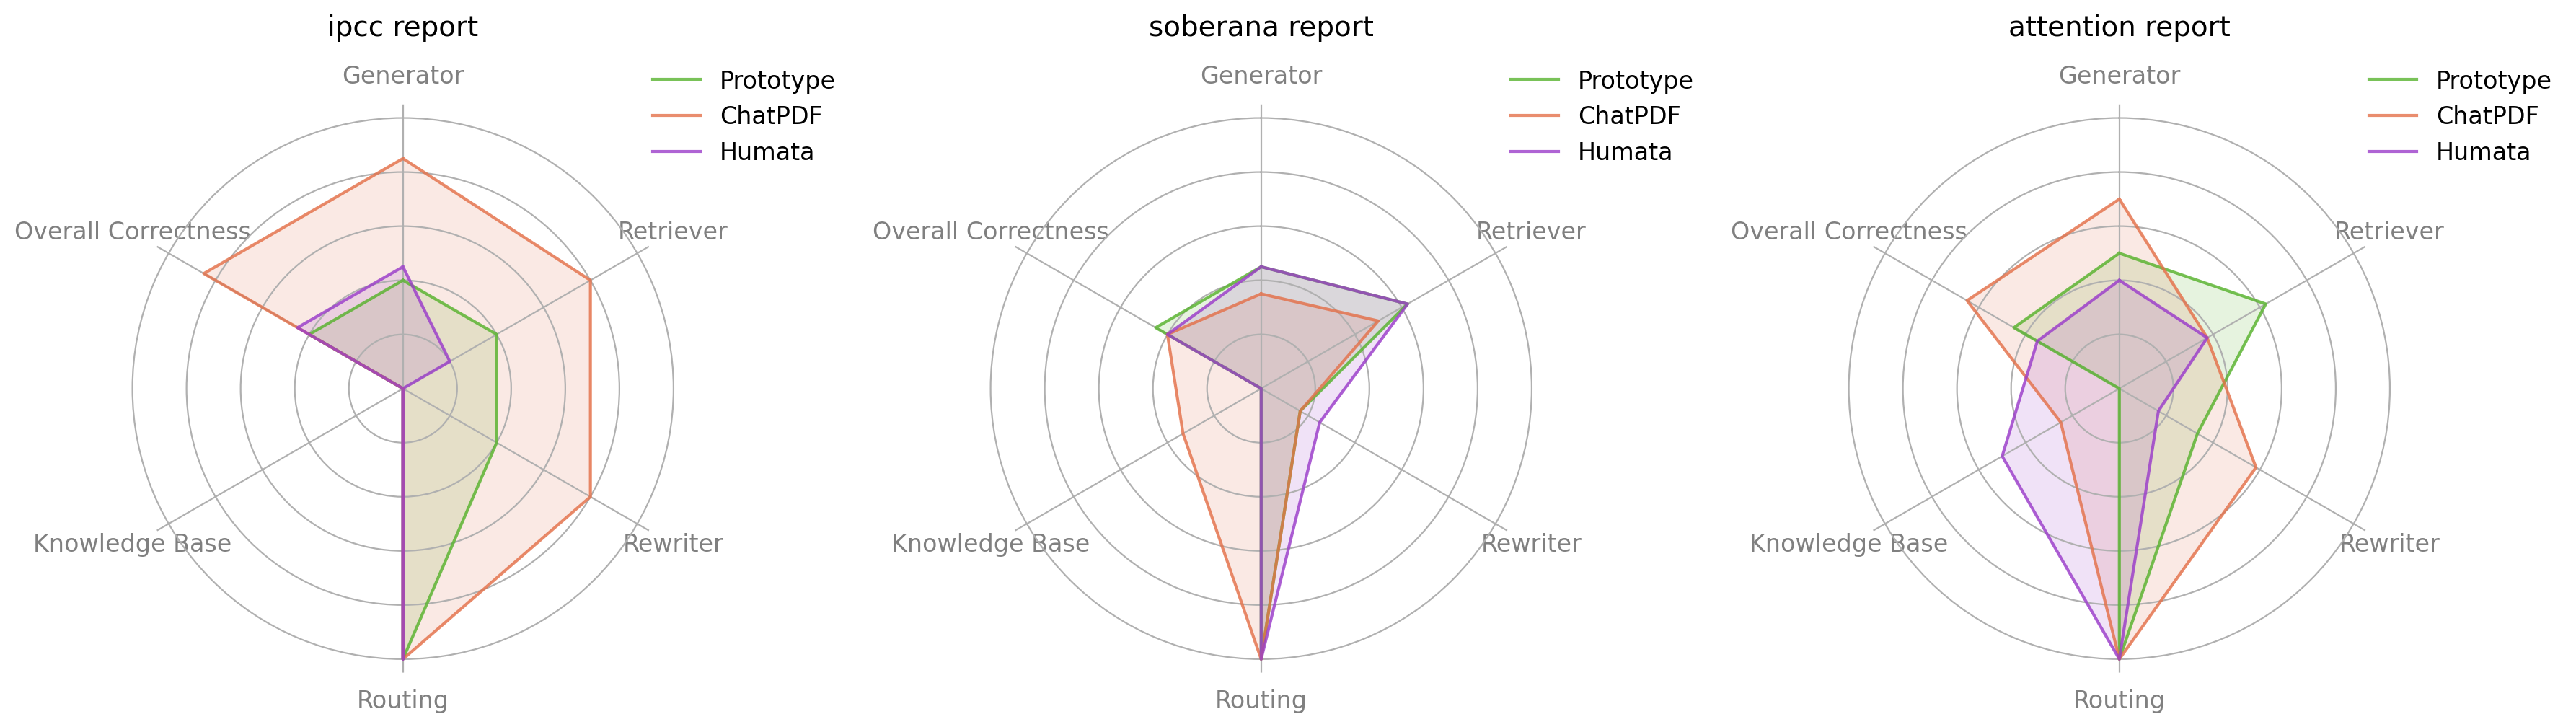

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

plt.rcParams['figure.dpi'] = 200  # Set figure DPI to 200
plt.rcParams['savefig.dpi'] = 300  # Set savefig DPI to 300

# Define a softer color palette
colors = {"Prototype": "#58b32e", "ChatPDF": "#e4714a", "Humata": "#9b3dca"}  # Light blue and peach colors

metrics = ["Generator", "Retriever", "Rewriter", "Routing", "Knowledge Base", "Overall Correctness"]
num_metrics = len(metrics)

def create_radar_chart(data, title, ax, colors):
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
    angles += angles[:1]  # Close the loop

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable and add labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, fontsize=12, color="gray")

    # Draw y-labels and remove frame
    ax.spines["polar"].set_visible(False)
    ax.set_rgrids([20, 40, 60, 80, 100], color="gray", alpha=0.2)
    ax.set_yticklabels([])

    # Plot data
    for system, values in data.items():
        values += values[:1]  # Close the loop
        ax.plot(angles, values, label=system, color=colors[system], linewidth=1.5, alpha=0.8)
        ax.fill(angles, values, alpha=0.15, color=colors[system])

    ax.set_title(title, size=14, color="black", y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), frameon=False, fontsize=12)

# Re-plotting with improvements
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(polar=True))

for i, dataset in enumerate(datasets):
    data = grouped_data[dataset].to_dict("list")
    create_radar_chart(data, dataset, axs[i], colors)

plt.tight_layout()
plt.show()
